In [1]:
# four-peaks problems 
import six
import sys
sys.modules['sklearn.externals.six'] = six

import mlrose
import numpy as np
import os
import pandas as pd
import time

import itertools

SEED = 42

In [24]:
import matplotlib.pyplot as plt

In [22]:
import timeit


In [59]:
import dataframe_image as dfi

In [2]:
import mlrose_hiive

In [3]:
GA_hyperparameters = [
    [10, 50, 250, 1250],
    [50, 100, 200, 300, 500],
    [0.1, 0.2, 0.3, 0.4, 0.5] 
]

In [4]:
SA_hyperparameters = [
   [0.1, 0.2, 1, 5, 25, 125],
   [0.025, 0.05, 0.1, 0.2, 0.4, 0.8],
   [0.0001,0.001, 0.01, 0.1]
]


In [5]:
RHC_hyperparameters = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [6]:
MIMIC_hyperparameters = [0.1, 0.3, 0.5, 0.7, 0.9]

# Four Peaks

In [7]:
# Four Peaks Problem: with length of 40, there are two local maxima of 40, and two optima of 75
fitness = mlrose.FourPeaks(t_pct=0.1)
problem = mlrose.DiscreteOpt(length=40, fitness_fn=fitness, maximize=True, max_val=2)
perfect_score = 75

## fourpeaks GA


In [8]:
# build problems
EXPERIMENT_NAME = "FourPeaks_GA"
best_param_ga = None
best_ga = None

for param in itertools.product(*GA_hyperparameters):
    max_attempts, pop_size, mutation_prob = param
#     print(max_attempts, pop_size, mutation_prob)
    best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem,pop_size = pop_size,
                                                  mutation_prob = mutation_prob,
                                                  max_attempts=max_attempts,
                                                  max_iters=500,
                                                  curve=True,
                                                  random_state=SEED)
#     run_time = time.perf_counter() - start_time
#     stopped_at = curve.size
#     results_list.append((EXPERIMENT_NAME, attempts, iterations, pop_size, mutation_prob,
#                          run_time, best_fitness, stopped_at))  
    if not best_ga:
        best_param_ga = param
        best_ga = best_fitness
    elif best_fitness > best_ga:
        best_param_ga = param
        best_ga = best_fitness
print("Best param {} = {}".format(EXPERIMENT_NAME, str(best_param_ga)))

Best parameters for FourPeaks_GA = (250, 500, 0.1)


## Four_peaks SA

In [9]:
EXPERIMENT_NAME = "FourPeaks_SA"
best_param_sa = None
best_sa = None
for param in itertools.product(*SA_hyperparameters):
#     print(param)
    init_temp, decay, min_temp  = param
    decay = mlrose_hiive.GeomDecay(init_temp = init_temp, decay = decay, min_temp = min_temp)

    best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(
                                                    problem, 
                                                    max_attempts=500, 
                                                    max_iters=300, 
                                                    curve=True, 
                                                    random_state=SEED,
                                                    schedule=decay)

    if not best_sa:
        best_param_sa = param
        best_sa = best_fitness
    elif best_fitness > best_sa:
        best_param_sa = param
        best_sa = best_fitness
print("Best param {} = {}".format(EXPERIMENT_NAME, str(best_param_sa)))

Best parameters for FourPeaks_SA = (0.1, 0.025, 0.0001)


## Four Peaks RHC

In [11]:
EXPERIMENT_NAME = "FourPeaks_RHC"

best_restart_param = None
best_restart_fitness_value = None

for param in RHC_hyperparameters:
    best_state, best_fitness, fitness_curve = mlrose.random_hill_climb(problem, 
                                                            max_attempts = 500, 
                                                            max_iters=300, 
                                                            curve=True, 
                                                            random_state=SEED,
                                                            restarts=param)
    if not best_restart_fitness_value:
        best_restart_param = param
        best_restart_fitness_value = best_fitness
    elif best_fitness > best_restart_fitness_value:
        best_restart_param = param
        best_restart_fitness_value = best_fitness
print("Best param {} = {}".format(EXPERIMENT_NAME, str(best_restart_param)))   

Best RHC parameters for FourPeaks_RHC = 60


## Four Peaks MIMIC

In [13]:
EXPERIMENT_NAME = "FourPeaks_MIMIC"

best_param_mimic = None
best_fitness_mimic = None

for param in MIMIC_hyperparameters:
    print(param)
    best_state, best_fitness, fitness_curve = mlrose.mimic(
                                                        problem,
                                                        keep_pct = param,
                                                        max_attempts = 100, 
                                                        max_iters = 100,  
                                                        curve = True, 
                                                        random_state = SEED)
    if not best_fitness_mimic:
        best_param_mimic  = param
        best_fitness_mimic = best_fitness
    elif best_fitness > best_fitness_mimic:
        best_param_mimic  = param
        best_fitness_mimic = best_fitness
print("Best param {} = {}".format(EXPERIMENT_NAME, str(best_param_mimic)))

0.1
0.3
0.5
0.7
0.9


NameError: name 'best_param' is not defined

In [14]:
print("Best param {} = {}".format(EXPERIMENT_NAME, str(best_param_mimic)))

Best parameters for FourPeaks_MIMIC = 0.3


[]

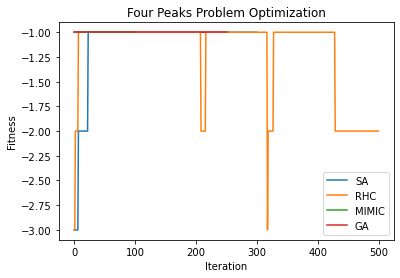

In [63]:
# Four peaks figures
# best params:
# Best parameters for FourPeaks_GA = (250, 500, 0.1)
# Best parameters for FourPeaks_SA = (0.1, 0.025, 0.0001)
# Best RHC parameters for FourPeaks_RHC = 60
# Best parameters for FourPeaks_MIMIC = 0.3

# GA
# print("Running Genetic Algorithm Experiment")
ga_best_state, ga_best_fitness, ga = mlrose.genetic_alg(problem, max_attempts=250, pop_size=500, mutation_prob=0.1,max_iters=500,curve=True, random_state=SEED)
ga_time = timeit.timeit(lambda: mlrose.genetic_alg(problem, max_attempts=250, pop_size=500, mutation_prob=0.1,max_iters=500, curve=True, random_state=SEED), number=3)

# SA
# print("Running Simulated Annealing Experiment")
schedule = mlrose_hiive.GeomDecay(init_temp = 0.1, decay = 0.025, min_temp = 0.0001)
sa_best_state, sa_best_fitness, sa = mlrose.simulated_annealing(problem, schedule=schedule, max_attempts=500, max_iters=300, curve=True, random_state=42)
sa_time = timeit.timeit(lambda: mlrose.simulated_annealing(problem, schedule=schedule, max_attempts=500, max_iters=300, curve=True, random_state=SEED), number=3)

# RHC
# print("Running Random Hill Climb Experiment")
rhc_best_state, rhc_best_fitness, rhc = mlrose.random_hill_climb(problem, 
                                                            max_attempts = 100, 
                                                            max_iters=300, 
                                                            curve=True, 
                                                            random_state=SEED,
                                                            restarts=60)
rhc_time = timeit.timeit(lambda: mlrose.random_hill_climb(problem, 
                                                            max_attempts = 100, 
                                                            max_iters=300, 
                                                            curve=True, 
                                                            random_state=SEED,
                                                            restarts=60), number=3)


# MIMIC
# print("Running MIMIC Algorithm Experiment")
mimic_best_state, mimic_best_fitness, mimic = mlrose.mimic(
                                                        problem,
                                                        keep_pct = 0.3,
                                                        max_attempts = 100, 
                                                        max_iters = 100,  
                                                        curve = True, 
                                                        random_state = SEED)
mimic_time = timeit.timeit(lambda: mlrose.mimic(problem,
                                                        keep_pct = 0.3,
                                                        max_attempts = 100, 
                                                        max_iters = 300,  
                                                        curve = True, 
                                                        random_state = SEED), number=3)

plt.plot(sa, label='SA')
plt.plot(rhc[:500], label='RHC')
plt.plot(mimic, label='MIMIC')
plt.plot(ga, label='GA')
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.legend(loc="lower right")
plt.title('Four Peaks Problem Optimization')
plt.plot()



In [66]:
# time 
print('Running time of Four Peaks')
data = [('RHC', round(rhc_time/3, 5)),
        ('SA', round(sa_time/3, 5)),
        ('GA', round(ga_time/3, 5)),
        ('MIMIC', round(mimic_time/3, 5))]

df = pd.DataFrame(data, columns=['Algorithm', 'Time (s)'])
print(df)

Running time of Four Peaks
  Algorithm  Time (s)
0       RHC   0.06719
1        SA   0.00510
2        GA   7.92063
3     MIMIC   2.46730


# Eight Queens

In [15]:
fitness = mlrose.Queens()
problem = mlrose.DiscreteOpt(length = 8, fitness_fn = fitness, maximize = False, max_val = 8)

## Eight Queens GA

In [16]:
EXPERIMENT_NAME = "EightQueens_GA"

best_param_ga = None
best_ga = None

for param in itertools.product(*GA_hyperparameters):
    max_attempts, pop_size, mutation_prob = param
    best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem,pop_size = pop_size,
                                                  mutation_prob = mutation_prob,
                                                  max_attempts=max_attempts,
                                                  max_iters=500,
                                                  curve=True,
                                                  random_state=SEED)
    if not best_ga:
        best_param_ga = param
        best_ga = best_fitness
    elif best_fitness > best_ga:
        best_param_ga = param
        best_ga = best_fitness
print("Best param {} = {}".format(EXPERIMENT_NAME, str(best_param_ga)))


Best parameters for EightQueens_GA = (10, 50, 0.1)


## Eight Queens SA

In [18]:
EXPERIMENT_NAME = "EightQueens_SA"

best_param_sa = None
best_sa = None

for param in itertools.product(*SA_hyperparameters):

    init_temp, decay, min_temp  = param
    decay = mlrose_hiive.GeomDecay(init_temp = init_temp, decay = decay, min_temp = min_temp)

    best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(
                                                    problem, 
                                                    max_attempts=500, 
                                                    max_iters=300, 
                                                    curve=True, 
                                                    random_state=SEED,
                                                    schedule=decay)
    if not best_sa:
        best_param_sa = param
        best_sa = best_fitness
    elif best_fitness > best_sa:
        best_param_sa = param
        best_sa = best_fitness
print("Best param {} = {}".format(EXPERIMENT_NAME, str(best_param_sa)))

Best parameters for EightQueens_SA = (1, 0.8, 0.0001)


## Eight Queens RHC

In [20]:
EXPERIMENT_NAME = "EightQueens_RHC"

best_restart_param = None
best_restart_fitness_value = None

for param in RHC_hyperparameters:
    best_state, best_fitness, fitness_curve = mlrose.random_hill_climb(problem, 
                                                            max_attempts = 500, 
                                                            max_iters=300, 
                                                            curve=True, 
                                                            random_state=SEED,
                                                            restarts=param)
    if not best_restart_fitness_value:
        best_restart_param = param
        best_restart_fitness_value = best_fitness
    elif best_fitness > best_restart_fitness_value:
        best_restart_param = param
        best_restart_fitness_value = best_fitness
print("Best param {} = {}".format(EXPERIMENT_NAME, str(best_restart_param)))  

Best RHC parameters for EightQueens_RHC = 0


## Eight Queens MIMIC

In [32]:
EXPERIMENT_NAME = "EightQueens_MIMIC"

best_param_mimic = None
best_fitness_mimic = None

for param in MIMIC_hyperparameters:
    print(param)
    best_state, best_fitness, fitness_curve = mlrose.mimic(
                                                        problem,
                                                        keep_pct = param,
                                                        max_attempts = 100, 
                                                        max_iters = 100,  
                                                        curve = True, 
                                                        random_state = SEED)
    if not best_fitness_mimic:
        best_param_mimic  = param
        best_fitness_mimic = best_fitness
    elif best_fitness > best_fitness_mimic:
        best_param_mimic  = param
        best_fitness_mimic = best_fitness
print("Best param {} = {}".format(EXPERIMENT_NAME, str(best_param_mimic)))

0.1
0.3
0.5
0.7
0.9
Best parameters for EightQueens_MIMIC = 0.1


[]

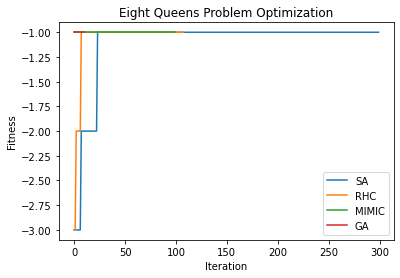

In [67]:
# eight queens figures
# best params:
# Best parameters for EightQueens_GA = (10, 50, 0.1)
# Best parameters for EightQueens_SA = (1, 0.8, 0.0001)
# Best RHC parameters for EightQueens_RHC = 0
# Best parameters for EightQueens_MIMIC = 0.1

# GA
# print("Running Genetic Algorithm Experiment")
ga_best_state, ga_best_fitness, ga = mlrose.genetic_alg(problem, max_attempts=10, pop_size=50, mutation_prob=0.1,max_iters=500,curve=True, random_state=SEED)
ga_time = timeit.timeit(lambda: mlrose.genetic_alg(problem, max_attempts=10, pop_size=50, mutation_prob=0.1,max_iters=500, curve=True, random_state=SEED), number=3)

# SA
# print("Running Simulated Annealing Experiment")
schedule = mlrose_hiive.GeomDecay(init_temp = 1, decay = 0.8, min_temp = 0.0001)
sa_best_state, sa_best_fitness, sa = mlrose.simulated_annealing(problem, schedule=schedule, max_attempts=500, max_iters=300, curve=True, random_state=42)
sa_time = timeit.timeit(lambda: mlrose.simulated_annealing(problem, schedule=schedule, max_attempts=500, max_iters=300, curve=True, random_state=SEED), number=3)

# RHC
# print("Running Random Hill Climb Experiment")
rhc_best_state, rhc_best_fitness, rhc = mlrose.random_hill_climb(problem, 
                                                            max_attempts = 100, 
                                                            max_iters=300, 
                                                            curve=True, 
                                                            random_state=SEED,
                                                            restarts=0)
rhc_time = timeit.timeit(lambda: mlrose.random_hill_climb(problem, 
                                                            max_attempts = 100, 
                                                            max_iters=300, 
                                                            curve=True, 
                                                            random_state=SEED,
                                                            restarts=0), number=3)


# MIMIC
# print("Running MIMIC Algorithm Experiment")
mimic_best_state, mimic_best_fitness, mimic = mlrose.mimic(
                                                        problem,
                                                        keep_pct = 0.1,
                                                        max_attempts = 100, 
                                                        max_iters = 100,  
                                                        curve = True, 
                                                        random_state = SEED)
mimic_time = timeit.timeit(lambda: mlrose.mimic(problem,
                                                        keep_pct = 0.1,
                                                        max_attempts = 100, 
                                                        max_iters = 300,  
                                                        curve = True, 
                                                        random_state = SEED), number=3)

plt.plot(sa, label='SA')
plt.plot(rhc[:500], label='RHC')
plt.plot(mimic, label='MIMIC')
plt.plot(ga, label='GA')
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.legend(loc="lower right")
plt.title('Eight Queens Problem Optimization')
plt.plot()

In [69]:
# time 
print('Running time of Eight Queens')
data = [('RHC', round(rhc_time/3, 5)),
        ('SA', round(sa_time/3, 5)),
        ('GA', round(ga_time/3, 5)),
        ('MIMIC', round(mimic_time/3, 5))]

df = pd.DataFrame(data, columns=['Algorithm', 'Time (s)'])
print(df)

Running time of Eight Queens
  Algorithm  Time (s)
0       RHC   0.00139
1        SA   0.00497
2        GA   0.03570
3     MIMIC   2.47441


# MaxKColor

In [34]:
# Define Fitness function and discrete problem object
edges = [(0, 1), (1, 2), (0, 2), (1, 3), (2, 3), (3, 4)]
fitness = mlrose.MaxKColor(edges)
problem = mlrose.DiscreteOpt(length=8, fitness_fn=fitness, maximize=False, max_val=2)

## MaxKClolor GA

In [35]:
EXPERIMENT_NAME = "MaxKClolor_GA"

best_param_ga = None
best_ga = None

for param in itertools.product(*GA_hyperparameters):
    max_attempts, pop_size, mutation_prob = param

    best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem,pop_size = pop_size,
                                                  mutation_prob = mutation_prob,
                                                  max_attempts=max_attempts,
                                                  max_iters=500,
                                                  curve=True,
                                                  random_state=SEED)
    if not best_ga:
        best_param_ga = param
        best_ga = best_fitness
    elif best_fitness > best_ga:
        best_param_ga = param
        best_ga = best_fitness
print("Best param {} = {}".format(EXPERIMENT_NAME, str(best_param_ga)))

Best parameters for MaxKClolor_GA = (10, 50, 0.1)


## MaxKClolor SA

In [38]:
# MaxKClolor
EXPERIMENT_NAME = "MaxKClolor_SA"

best_param_sa = None
best_sa = None

for param in itertools.product(*SA_hyperparameters):

    init_temp, decay, min_temp  = param
    decay = mlrose_hiive.GeomDecay(init_temp = init_temp, decay = decay, min_temp = min_temp)

    best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(
                                                    problem, 
                                                    max_attempts=500, 
                                                    max_iters=300, 
                                                    curve=True, 
                                                    random_state=SEED,
                                                    schedule=decay)
    if not best_param_sa:
        best_param_sa = param
        best_sa = best_fitness
    elif best_fitness > best_sa:
        best_param_sa = param
        best_sa = best_fitness
print("Best param {} = {}".format(EXPERIMENT_NAME, str(best_param_sa)))

Best parameters for MaxKClolor_SA = (0.1, 0.025, 0.0001)


## MaxKClolor RHC

In [39]:
# MaxKClolor
EXPERIMENT_NAME = "MaxKClolor_RHC"

best_restart_param = None
best_restart_fitness_value = None

for param in RHC_hyperparameters:
    best_state, best_fitness, fitness_curve = mlrose.random_hill_climb(problem, 
                                                            max_attempts = 500, 
                                                            max_iters=300, 
                                                            curve=True, 
                                                            random_state=SEED,
                                                            restarts=param)
    if not best_restart_fitness_value:
        best_restart_param = param
        best_restart_fitness_value = best_fitness
    elif best_fitness > best_restart_fitness_value:
        best_restart_param = param
        best_restart_fitness_value = best_fitness
print("Best param {} = {}".format(EXPERIMENT_NAME, str(best_restart_param)))  

Best RHC parameters for MaxKClolor_RHC = 0


## MaxKClolor MIMIC

In [43]:
# MaxKClolor
EXPERIMENT_NAME = "MaxKClolor_MIMIC"

best_param_mimic = None
best_fitness_mimic = None

for param in MIMIC_hyperparameters:
    print(param)
    best_state, best_fitness, fitness_curve = mlrose.mimic(
                                                        problem,
                                                        keep_pct = param,
                                                        max_attempts = 100, 
                                                        max_iters = 100,  
                                                        curve = True, 
                                                        random_state = SEED)
    if not best_fitness_mimic:
        best_param_mimic  = param
        best_fitness_mimic = best_fitness
    elif best_fitness > best_fitness:
        best_param_mimic  = param
        best_fitness_mimic = best_fitness
print("Best param {} = {}".format(EXPERIMENT_NAME, str(best_param_mimic)))

0.1
0.3
0.5
0.7
0.9
Best parameters for MaxKClolor_MIMIC = 0.1


[]

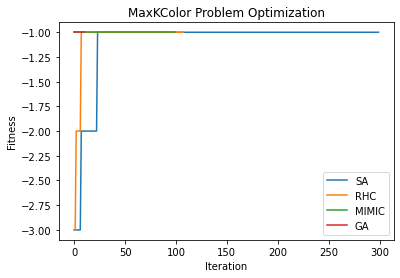

In [70]:
# maxKColor figures
# best params:
# Best parameters for MaxKClolor_GA = (10, 50, 0.1)
# Best parameters for MaxKClolor_SA = (0.1, 0.025, 0.0001)
# Best RHC parameters for MaxKClolor_RHC = 0
# Best parameters for MaxKClolor_MIMIC = 0.1

# GA
# print("Running Genetic Algorithm Experiment")
ga_best_state, ga_best_fitness, ga = mlrose.genetic_alg(problem, max_attempts=10, pop_size=50, mutation_prob=0.1,max_iters=500,curve=True, random_state=SEED)
ga_time = timeit.timeit(lambda: mlrose.genetic_alg(problem, max_attempts=10, pop_size=50, mutation_prob=0.1,max_iters=500, curve=True, random_state=SEED), number=3)

# SA
# print("Running Simulated Annealing Experiment")
schedule = mlrose_hiive.GeomDecay(init_temp = 0.1, decay = 0.025, min_temp = 0.0001)
sa_best_state, sa_best_fitness, sa = mlrose.simulated_annealing(problem, schedule=schedule, max_attempts=500, max_iters=300, curve=True, random_state=42)
sa_time = timeit.timeit(lambda: mlrose.simulated_annealing(problem, schedule=schedule, max_attempts=500, max_iters=300, curve=True, random_state=SEED), number=3)

# RHC
# print("Running Random Hill Climb Experiment")
rhc_best_state, rhc_best_fitness, rhc = mlrose.random_hill_climb(problem, 
                                                            max_attempts = 100, 
                                                            max_iters=300, 
                                                            curve=True, 
                                                            random_state=SEED,
                                                            restarts=0)
rhc_time = timeit.timeit(lambda: mlrose.random_hill_climb(problem, 
                                                            max_attempts = 100, 
                                                            max_iters=300, 
                                                            curve=True, 
                                                            random_state=SEED,
                                                            restarts=0), number=3)


# MIMIC
# print("Running MIMIC Algorithm Experiment")
mimic_best_state, mimic_best_fitness, mimic = mlrose.mimic(
                                                        problem,
                                                        keep_pct = 0.1,
                                                        max_attempts = 100, 
                                                        max_iters = 100,  
                                                        curve = True, 
                                                        random_state = SEED)
mimic_time = timeit.timeit(lambda: mlrose.mimic(problem,
                                                        keep_pct = 0.1,
                                                        max_attempts = 100, 
                                                        max_iters = 300,  
                                                        curve = True, 
                                                        random_state = SEED), number=3)


plt.plot(sa, label='SA')
plt.plot(rhc[:500], label='RHC')
plt.plot(mimic, label='MIMIC')
plt.plot(ga, label='GA')
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.legend(loc="lower right")
plt.title('MaxKColor Problem Optimization')
plt.plot()

In [71]:
# time 
print('Running time of MaxKcolor')
data = [('RHC', round(rhc_time/3, 5)),
        ('SA', round(sa_time/3, 5)),
        ('GA', round(ga_time/3, 5)),
        ('MIMIC', round(mimic_time/3, 5))]

df = pd.DataFrame(data, columns=['Algorithm', 'Time (s)'])
print(df)

Running time of MaxKcolor
  Algorithm  Time (s)
0       RHC   0.00106
1        SA   0.00487
2        GA   0.03501
3     MIMIC   2.45349
